# Communicate Data Findings Project

## Part 2 - PISA Data 

The PISA data set for the data visualizations comprise of mostly student responses to a questionnaires taken by 15-old year old students in 65 countries. This project focuses on PISA data for China, Singapore, and the United Statues. This data set also has the math literacy score for each student along with other quantitative variables such as number of hours studying away from school, number of math classes taken in a week, maximum years of parents education, derived scores for math self concept, math work ethic, and math teacher support.
<br/><br/>
Because there are missing values on every record in almost all columns in the data set, a separate dataframe is created for each group of charts and cleaned by removing records with missing data. The features of this data set will be the differences in student attitudes, opinions, and scores among the United States versus both China and Singapore.

In [207]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [208]:
df_pisa = pd.read_csv('./data/pisa2012_data_clean.csv')
df_pisa.head()

,country,gender,mother_curr_job_status,father_curr_job_status,parents_believe_math_career,parents_believe_math_study,parents_like_math,highest_parent_education_yrs,behaviour_max_math_sci_classes,behaviour_math_sci_college_major,...,no_of_math_classes_wk,no_of_all_classes_wk,class_size,math_self_concept,math_work_ethic,math_work_ethic_anchored,math_teacher_support_anchored,math_self_concept_anchored,math_literacy_score,senate_weight
0,China-Shanghai,Male,"Other (e.g. home duties, retired)","Not working, but looking for a job",Strongly agree,Agree,Agree,12.0,Maximum classes Math,Major in college Math,...,NaN,NaN,NaN,0.65,2.0389,2.4243,1.9408,1.0014,661.4815,0.1897
1,China-Shanghai,Male,"Other (e.g. home duties, retired)",Working full-time <for pay>,Agree,Agree,Agree,16.0,Maximum classes Math,Major in college Math,...,NaN,NaN,NaN,0.88,2.7167,1.1311,0.5831,0.7562,676.4371,0.1897
2,China-Shanghai,Female,Working full-time <for pay>,Working full-time <for pay>,NaN,NaN,NaN,12.0,NaN,NaN,...,5.0,43.0,37.0,-0.52,NaN,NaN,1.5224,0.2649,639.0481,0.1897
3,China-Shanghai,Female,Working full-time <for pay>,Working full-time <for pay>,NaN,NaN,NaN,15.0,NaN,NaN,...,5.0,NaN,42.0,-0.76,NaN,NaN,0.4052,0.2052,740.9332,0.1897
4,China-Shanghai,Male,"Other (e.g. home duties, retired)","Other (e.g. home duties, retired)",Agree,Strongly agree,Agree,9.0,Maximum classes Math,Major in college Math,...,6.0,51.0,43.0,NaN,2.0389,NaN,NaN,NaN,735.1690,0.1897


In [209]:
df_pisa.info(max_cols=125)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15701 entries, 0 to 15700
Data columns (total 48 columns):
country                             15701 non-null object
gender                              15701 non-null object
mother_curr_job_status              15476 non-null object
father_curr_job_status              15102 non-null object
parents_believe_math_career         10363 non-null object
parents_believe_math_study          10374 non-null object
parents_like_math                   10355 non-null object
highest_parent_education_yrs        15536 non-null float64
behaviour_max_math_sci_classes      10190 non-null object
behaviour_math_sci_college_major    10179 non-null object
behaviour_pursue_mathsci_career     10143 non-null object
math_interested                     10361 non-null object
belonging_feel_lonely_sch           10307 non-null object
belonging_feel_happy_sch            10304 non-null object
belonging_feel_outsider             10321 non-null object
belonging_satisfied_

In [210]:
df_pisa.country.value_counts()

Singapore                   5546
China-Shanghai              5177
United States of America    4978
Name: country, dtype: int64

### Data cleaning for  United States, China, Singapore <a name='data_cleaning'/>
<a href='#univariate' style='text-decoration:none;font-size:14px'>Go to Univariate Explore</a><br/>
<a href='#bivariate' style='text-decoration:none;font-size:14px'>Go to Bivariate Analysis</a>
<br>
> The PISA dataset has missing values on every row for at least one column which made removing all of the missing values difficult without large data loss.  To remedy this limitation, a separate dataframe is created for each group of plots. Furthermore, the number of records for each country in the dataset is different.  China and Singapore each has more records than the United States which could potentially skew the data visualizations. As a result, an even sample of records from each country, China, Singapore, United States is taken and included into the new dataframes used to produce each plot.


In [211]:
df_pisa_copy = df_pisa.copy()

In [212]:
def return_opinion_dict(col = []):
    ordinal_opinion = ['Strongly disagree','Disagree','Agree','Strongly agree']
    ordinal_dict = {}
    for i in col:
        ordinal_dict[i] = ordinal_opinion
    return ordinal_dict 

In [213]:
opinion_cols = ['parents_believe_math_career', 'parents_believe_math_study', 'parents_like_math',
                'math_interested', 'belonging_feel_lonely_sch', 'belonging_feel_happy_sch', 
                'belonging_feel_outsider', 'belonging_satisfied_atsch']
ordinal_dict = return_opinion_dict(opinion_cols)

In [214]:
for var in ordinal_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories = ordinal_dict[var])
    df_pisa_copy[var] = df_pisa_copy[var].astype(ordered_var)

In [215]:
set(df_pisa_copy.father_curr_job_status)

{'Not working, but looking for a job',
 'Other (e.g. home duties, retired) ',
 'Working full-time <for pay> ',
 'Working part-time <for pay>',
 nan}

In [216]:
set(df_pisa_copy.behaviour_max_math_sci_classes)

{'Maximum classes Math', 'Maximum classes Science', nan}

In [217]:
set(df_pisa_copy.behaviour_math_sci_college_major)

{'Major in college Math', 'Major in college Science', nan}

In [218]:
set(df_pisa_copy.behaviour_pursue_mathsci_career)

{'Pursuing a career Math', 'Pursuing a career Science', nan}

In [219]:
max_class_dict = {'behaviour_max_math_sci_classes': ['Maximum classes Math', 'Maximum classes Science'],
                 'behaviour_math_sci_college_major': ['Major in college Math', 'Major in college Science'],
                 'behaviour_pursue_mathsci_career': ['Pursuing a career Math', 'Pursuing a career Science']}

for var in max_class_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=max_class_dict[var])
    df_pisa_copy[var] = df_pisa_copy[var].astype(ordered_var)

In [220]:
#convert float datatypes to int64
numeric_cols = ['outof_school_study_time','outof_school_study_guided_hw','outof_school_study_tutor',
                'outof_school_study_parent','highest_parent_education_yrs',  'class_size',
                'no_of_math_classes_wk', 'no_of_all_classes_wk','math_self_concept_anchored',
                'math_work_ethic_anchored','math_self_concept', 'math_work_ethic']

for var in numeric_cols:
    df_pisa_copy[var] = df_pisa_copy[var].fillna(0).astype('int64')

In [221]:
set(df_pisa_copy.behaviour_max_math_sci_classes)

{'Maximum classes Math', 'Maximum classes Science', nan}

In [222]:
set(df_pisa_copy.parents_believe_math_career)

{'Agree', 'Disagree', 'Strongly agree', 'Strongly disagree', nan}

In [223]:
print(df_pisa_copy.describe())

       highest_parent_education_yrs  outof_school_study_time  \
count                  15701.000000             15701.000000   
mean                      12.742883                 6.107573   
std                        3.179102                 7.954478   
min                        0.000000                 0.000000   
25%                       11.000000                 0.000000   
50%                       12.000000                 2.000000   
75%                       16.000000                10.000000   
max                       16.000000                30.000000   

       outof_school_study_guided_hw  outof_school_study_tutor  \
count                  15701.000000              15701.000000   
mean                       1.345265                  0.796765   
std                        3.007986                  1.976204   
min                        0.000000                  0.000000   
25%                        0.000000                  0.000000   
50%                        0.0000

### Take an equal sample of students from each country
This function creates a new dataframe from the PISA dataset. The dataframe is comprised of the columns passed in as an argument for a given sample size. This function accepts a True/False argument to drop NAN values from the new dataframe.

In [224]:
def create_dataframe_sample(cols, inplace_flag, sample_size):
    df_temp = pd.DataFrame(df_pisa_copy, columns=cols)
    df_temp.dropna(inplace=inplace_flag)
    df_us = df_temp.query('country=="United States of America"').sample(n=sample_size, random_state=45, replace=False)
    df_china = df_temp.query('country=="China-Shanghai"').sample(n=sample_size, random_state=45, replace=False)
    df_singapore = df_temp.query('country=="Singapore"').sample(n=sample_size, random_state=45, replace=False)
    df_new = df_us.append(df_china, ignore_index=True).append(df_singapore, ignore_index=True)
    return df_new

In [225]:
df_pisa_sample = create_dataframe_sample(df_pisa_copy.columns, False, 1000)
df_pisa_sample.country.value_counts()

United States of America    1000
China-Shanghai              1000
Singapore                   1000
Name: country, dtype: int64

## Univariate Exploration <a name='univariate'/>
<a href='#data_cleaning' style='text-decoration:none;font-size:14px'>Go to Data Cleaning</a><br/>
<a href='#bivariate' style='text-decoration:none;font-size:14px'>Go to Bivariate Explore</a>

In [226]:
def create_countplot_xcol(df, nrows,ax,col_names=[]):
    for i in range(nrows):
        ax_ret = sb.countplot(data=df, x=col_names[i], hue='country', ax=ax[i]);        
        ax_ret.legend(loc=0, ncol=1)

In [227]:
def create_countplot_ycol(df, nrows,ax,col_names=[]):
    for i in range(nrows): 
        sb.countplot(data=df, y=col_names[i], hue='country', ax=ax[i]);

### Parents demographic data

In [228]:
cols = ['country','mother_curr_job_status','father_curr_job_status', 'math_literacy_score']
df_curr=create_dataframe_sample(cols,True,1000)
df_curr.rename(columns={"mother_curr_job_status": "Mother current job status", "father_curr_job_status": "Father current job status"}, inplace=True)


In [229]:
df_curr.country.value_counts()

United States of America    1000
China-Shanghai              1000
Singapore                   1000
Name: country, dtype: int64

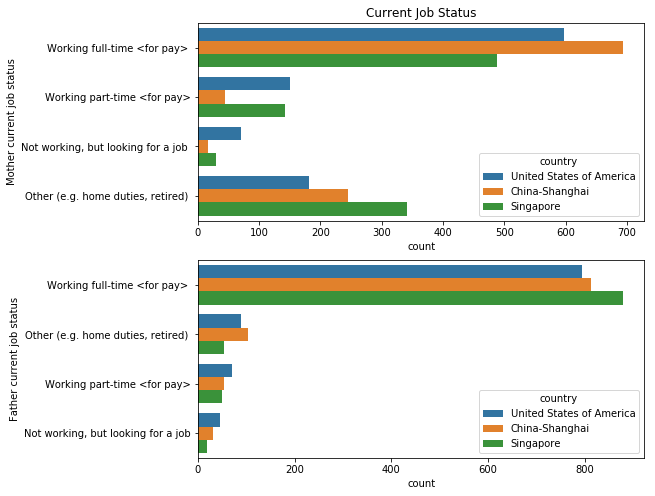

In [230]:
# family demographics in United States
nrows = 2
fig, ax = plt.subplots(nrows, figsize = [8,8])
ax[0].set_title('Current Job Status')
create_countplot_ycol(df_curr,nrows, ax, col_names=['Mother current job status','Father current job status'])

In the United States, a very large number of 15-year old students live in families in which both parents work full time. Similar to the United States, China and Singapore reveals that both the mother and father working full time is most prevalent.

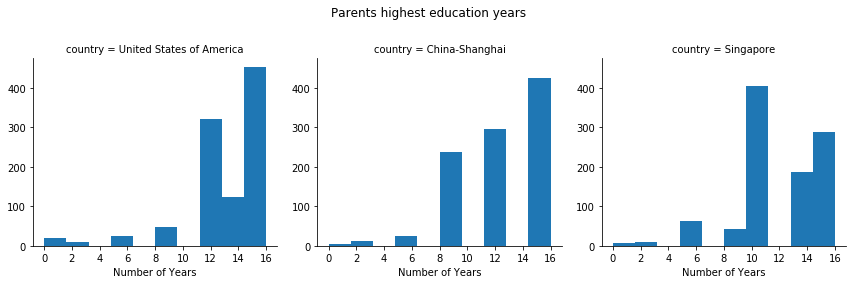

In [231]:
#parents highest number of years of schooling
g = sb.FacetGrid(df_pisa_sample, col="country", size=4)
g.map(plt.hist, "highest_parent_education_yrs")
plt.xticks(np.arange(0,18, step=2))
plt.subplots_adjust(top=0.8)
g.fig.set_figheight(4)
g.fig.suptitle('Parents highest education years')
g.set_axis_labels('Number of Years');

All three countries (China, Singapore, United States) have parents with at least 12 or more years of education

### Parents opinions on Math

In [232]:
cols = ['country','parents_believe_math_career','parents_believe_math_study','parents_like_math']
df_pa = create_dataframe_sample(cols,True,1000)
df_pa.rename(columns={"parents_believe_math_career":"Believe math important career", "parents_believe_math_study":"Believe in math study", "parents_like_math":"Likes math" }, inplace=True)


In [233]:
df_pa.country.value_counts()

United States of America    1000
China-Shanghai              1000
Singapore                   1000
Name: country, dtype: int64

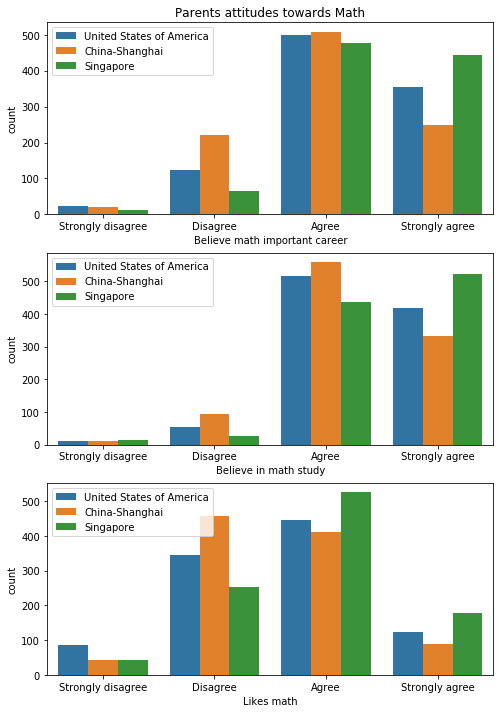

In [234]:
# parental attitudes towards math in United States
nrows = 3
fig, ax = plt.subplots(nrows, figsize = [8,12])
ax[0].set_title('Parents attitudes towards Math')
create_countplot_xcol(df_pa,nrows,ax,col_names=['Believe math important career','Believe in math study','Likes math'])


In United States, most parents of 15-year old students believe in math study and that math is important for a future career. The same holds true in China and Singapore. It is interesting that almost half of all parents dislike math in the United States.  In China, more than half of the parents dislike math. In Singapore, the bar chart indicates that more than half are in agreement that parents like math.

### Student Math opinions

In [235]:
cols=['country','math_interested','math_literacy_score']
df_st=create_dataframe_sample(cols,True,1000)
df_st.rename(columns={"math_interested":"Math Interest"}, inplace=True)


In [236]:
df_st.country.value_counts()

United States of America    1000
China-Shanghai              1000
Singapore                   1000
Name: country, dtype: int64

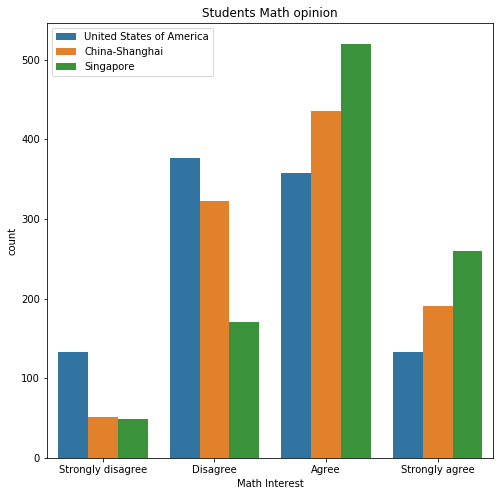

In [237]:
# Students opinions
plt.figure(figsize=[8,8])
plt.title('Students Math opinion')
ax_ret = sb.countplot(data=df_st, x='Math Interest', hue='country')        
ax_ret.legend(loc=0, ncol=1);


A little more than half of U.S. 15-year old students are not interested in math. About half of 15-year old students in China also report not being interested in Math. Singapore students show the strongest responses in interest in math.

In [238]:
df_outof_study = df_pisa_sample[df_pisa_sample.outof_school_study_time > 0]
df_outof_tutor = df_pisa_sample[df_pisa_sample.outof_school_study_tutor > 0]

### Students Study Time Outside Of School

In the United States of America, the number of 15-year old students outnumber China and Singapore for study time outside of school between one and five hours. But as the number of out of school hours studying increases above ten, China and Singapore each have more students studying outside of school than U.S. students. This shows that more China and Singapore students study outside of school for longer than five hours per week than students in the United States. Does this correlate to higher math literacy scores for students from China and Singapore?

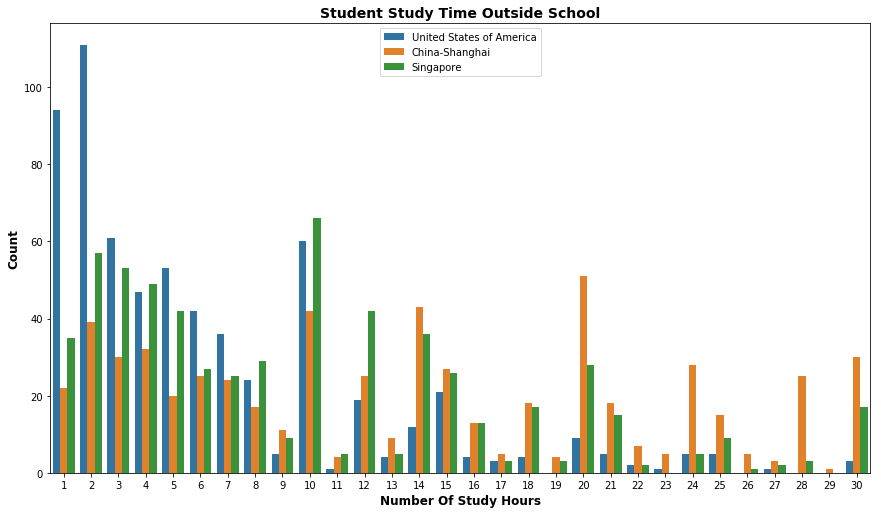

In [239]:
country_order = ['United States of America', 'China-Shanghai', 'Singapore']
plt.figure(figsize=[14.70,8.27])
plt.title('Student Study Time Outside School'.title(), fontsize=14, weight="bold")
ax_ret = sb.countplot(data=df_outof_study, x='outof_school_study_time', hue='country', hue_order=country_order)
plt.xlabel('Number of Study Hours'.title(), fontsize=12, weight="bold")
plt.ylabel('Count'.title(), fontsize=12, weight="bold")
ax_ret.legend(loc=9);

### Students Study Time Outside Of School With Tutor

In China and Singapore, considerably more 15-year old students spend time studying outside of school with a tutor. Does this correlate to higher math literacy scores for China and Singapore students?

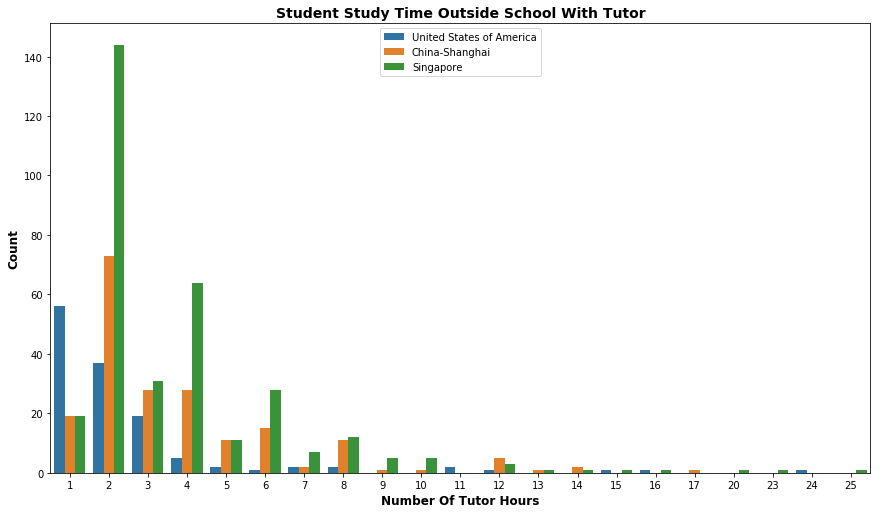

In [240]:
country_order = ['United States of America', 'China-Shanghai', 'Singapore']
plt.figure(figsize=[14.70,8.27])
plt.title('Student Study Time Outside School with Tutor'.title(), fontsize=14, weight="bold")
ax_ret = sb.countplot(data=df_outof_tutor, x='outof_school_study_tutor', hue='country', hue_order=country_order)
plt.xlabel('Number of Tutor Hours'.title(), fontsize=12, weight="bold")
plt.ylabel('Count'.title(), fontsize=12, weight="bold")
ax_ret.legend(loc=9);


### Students wanting to pursue careers in math versus science

In [241]:
cols=['country', 'behaviour_pursue_mathsci_career', 'behaviour_math_sci_college_major', 'behaviour_max_math_sci_classes', 'math_literacy_score']
df_b=create_dataframe_sample(cols,True,1000)
df_b.rename(columns={"behaviour_pursue_mathsci_career":"Math or Science career","behaviour_math_sci_college_major":"Major in Math or Science", "behaviour_max_math_sci_classes":"Maximize Math or Science classes"}, inplace=True)


In [242]:
df_b.country.value_counts()

United States of America    1000
China-Shanghai              1000
Singapore                   1000
Name: country, dtype: int64

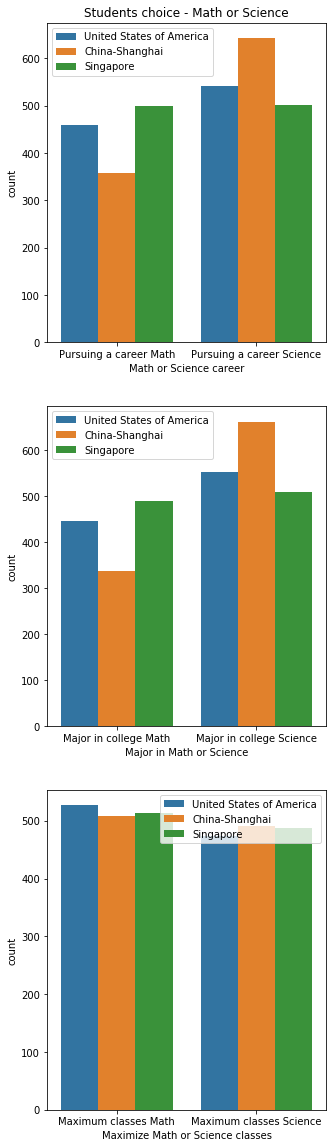

In [243]:
country_order =  ['United States of America','China-Shanghai','Singapore']

plt.figure(figsize=[5,20])

plt.subplot(3,1,1)
plt.title('Students choice - Math or Science')
ax_ret = sb.countplot(data=df_b, x='Math or Science career', hue='country', hue_order=country_order)
ax_ret.legend(loc=0)

plt.subplot(3,1,2)
ax_ret = sb.countplot(data=df_b, x='Major in Math or Science', hue='country', hue_order=country_order)
ax_ret.legend(loc=0)

plt.subplot(3,1,3)
ax_ret = sb.countplot(data=df_b, x='Maximize Math or Science classes', hue='country', hue_order=country_order)
ax_ret.legend(loc=0);


These three bar charts measures students future ambitions towards math versus science.  Students from China, Singapore, and United States prefer future careers in science versus math.  They also prefer a major in science as opposed to math. However, in the third bar chart, 15-year old students in all countries seem to maximize both math and science classes equally.

### Aggregate Number Of Math Classes Taken Per Week

Overall, most 15-year students take about 5 math classes per week. There are many 15-year olds in this dataset who take more than 5 math classes per week.  The total number of classes taken per week among all students ranges between 15 to 60. The next plot will show the number of math classes taken per week by 15-year old students for each country.

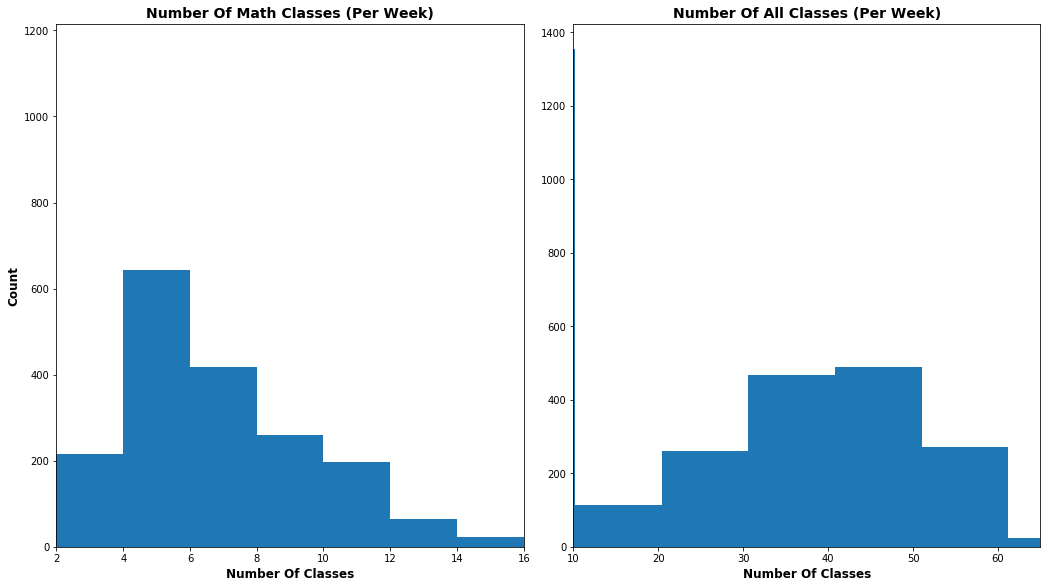

In [244]:
# All countries combined
fig, ax = plt.subplots(figsize=[14.70,8.27])

plt.subplot(1,2,1)
plt.title('Number of Math Classes (per week)'.title(), fontsize=14, weight="bold")
plt.hist(df_pisa_sample['no_of_math_classes_wk'])
plt.xlabel('Number of classes'.title(), fontsize=12, weight="bold")
plt.ylabel('Count'.title(), fontsize=12, weight="bold")
plt.xlim(2,16)
plt.tight_layout();

plt.subplot(1,2,2)
plt.title('Number of All classes (per week)'.title(), fontsize=14, weight="bold")
plt.hist(df_pisa_sample['no_of_all_classes_wk'])
plt.xlabel('Number of classes'.title(), fontsize=12, weight="bold")
plt.xlim(10,65)
plt.tight_layout();


### Number Of Math Classes Taken Per Week By Country

Here we see that most 15-year old students in the United States take between 1 and 5 math classes per week. Most 15-year old students from China and Singapore take between 5 and 10 math classes per week, far more than students in the United States. Does this correlate to higher math literacy scores in China and Singapore?

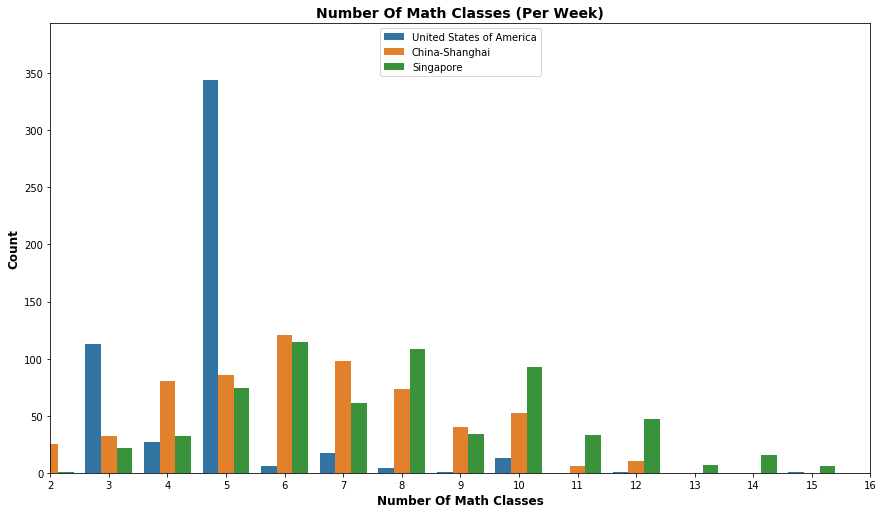

In [245]:
country_order =  ['United States of America','China-Shanghai','Singapore']

plt.figure(figsize=[14.70,8.27])
plt.title('Number of Math Classes (per week)'.title(), fontsize=14, weight="bold")
ax_ret = sb.countplot(data=df_pisa_sample, x='no_of_math_classes_wk', hue='country', hue_order=country_order)
ax_ret.legend(loc=9)
plt.xlabel('Number of math classes'.title(), fontsize=12, weight="bold")
plt.ylabel('Count'.title(), fontsize=12, weight="bold")
plt.xlim(2,16);

### Univariate Exploration Summary

- The highest number of education years shows all three countries with parents having 14 or more years of education.

- The maximum number of math and science classes appear identical for China, Singapore, United States

- The number of United States students studying outside of school is higher between 1 and 5 hours but lower than China and Singapore above 10 hours per week

- China and Singapore show more students spending time after school with a tutor

- Parents from all three countries have similar attitudes in believing math is important for careers

- Parents from all three countries also agree its important to study math

- Half of the parents in all three countries agree that they like math. Singapore may have a slightly higher count in number of parents liking math.

- The parents job status for both parents working full time is the highest count for each country.


## Bivariate Exploration <a name='bivariate'/>
<a href='#data_cleaning' style='text-decoration:none;font-size:14px'>Go to Data Cleaning</a><br/>
<a href='#univariate' style='text-decoration:none;font-size:14px'>Go to Univariate Explore</a><br/>
<a href='#multivariate' style='text-decoration:none;font-size:14px'>Go to Multivariate Explore</a>


### Categorical variables

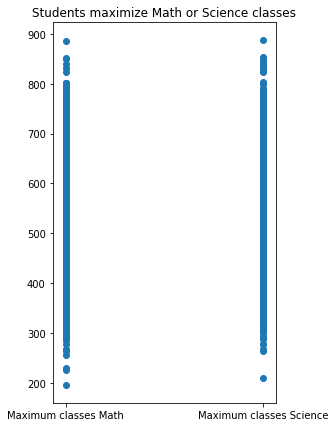

In [246]:
plt.figure(figsize=[4,7])
plt.scatter(data=df_b, x='Maximize Math or Science classes', y='math_literacy_score')
plt.title('Students maximize Math or Science classes');

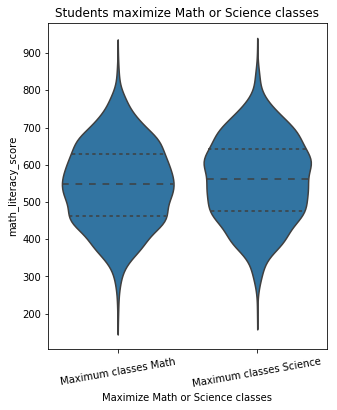

In [247]:
plt.figure(figsize = [5, 6])
base_color = sb.color_palette()[0]

sb.violinplot(data = df_b, x = 'Maximize Math or Science classes', y = 'math_literacy_score', inner='quartile', color = base_color)
plt.xticks(rotation = 10)
plt.title('Students maximize Math or Science classes');

The median math literacy scores seem identical for both groups of students maximizing math and science classes

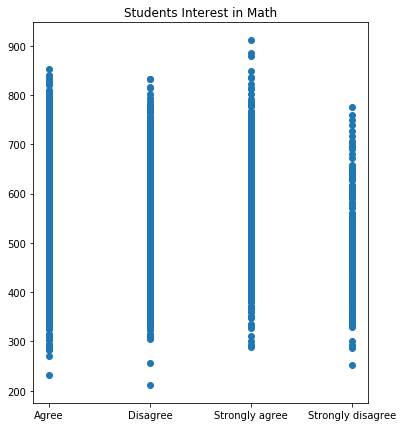

In [248]:
plt.figure(figsize=[6,7])
plt.scatter(data=df_st, x='Math Interest', y='math_literacy_score')
plt.title('Students Interest in Math');

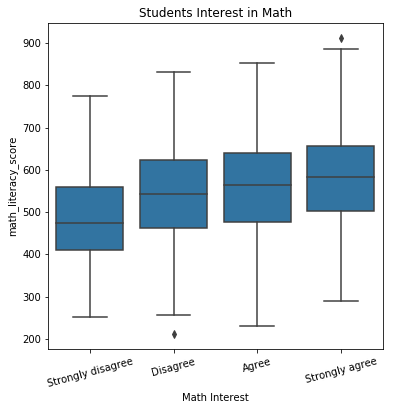

In [249]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[6,6])
sb.boxplot(data=df_st, x='Math Interest', y='math_literacy_score', color=base_color)
plt.title('Students Interest in Math')
plt.xticks(rotation=15);

The box plot shows a higher median math literacy score for 15-year old students who agree/strongly agree that they are interested in math as opposed to students who are not interested in math (Strongly disagree/Disagree).

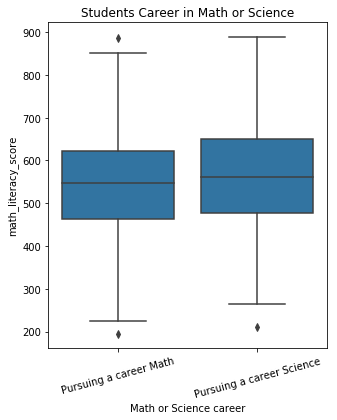

In [250]:
# behaviour_pursue_mathsci_career
base_color = sb.color_palette()[0]
plt.figure(figsize=[5,6])
sb.boxplot(data=df_b, x='Math or Science career', y='math_literacy_score', color=base_color)
plt.title('Students Career in Math or Science')
plt.xticks(rotation=15);

The median math literacy scores are about the same for both groups of 15-year old students pursuing careers in math or science

In [251]:
set(df_curr)

{'Father current job status',
 'Mother current job status',
 'country',
 'math_literacy_score'}

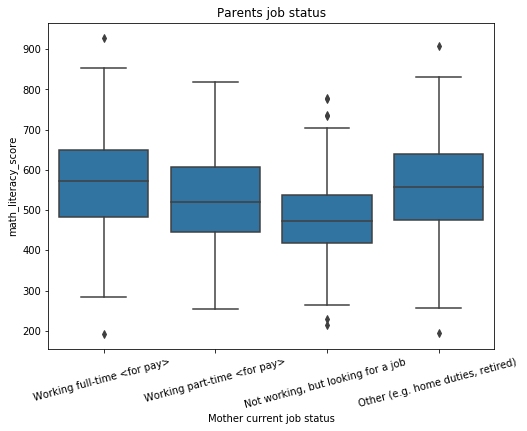

In [252]:
# mother_curr_job_status
base_color = sb.color_palette()[0]
plt.figure(figsize=[8,6])
sb.boxplot(data=df_curr, x='Mother current job status', y='math_literacy_score', color=base_color)
plt.title('Parents job status')
plt.xticks(rotation=15);

Students with mothers working full time have the highest median math literacy scores

### Quantitative variables

In [253]:
# create sample dataframe for Quantitative variables
cols=['country','outof_school_study_time','outof_school_study_tutor', 'outof_school_study_guided_hw', 'outof_school_study_parent',
      'no_of_math_classes_wk', 'no_of_all_classes_wk', 'highest_parent_education_yrs','math_literacy_score',
      'math_work_ethic_anchored','math_self_concept_anchored', 'math_work_ethic', 'math_self_concept']
df_qv_sample = create_dataframe_sample(cols, False, 150)

In [254]:
print(df_qv_sample.describe())

       outof_school_study_time  outof_school_study_tutor  \
count               450.000000                450.000000   
mean                  6.435556                  0.762222   
std                   7.546534                  1.814049   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   4.000000                  0.000000   
75%                  10.000000                  0.000000   
max                  30.000000                 13.000000   

       outof_school_study_guided_hw  outof_school_study_parent  \
count                    450.000000                 450.000000   
mean                       1.340000                   0.711111   
std                        2.615263                   1.956341   
min                        0.000000                   0.000000   
25%                        0.000000                   0.000000   
50%                        0.000000                   0.000000 

**Identify pairwise correlations among numeric variables**<br/>
Use dataframe with sample size of 3,000 students

In [255]:
numeric_vars = ['outof_school_study_time','outof_school_study_tutor', 'outof_school_study_guided_hw', 'outof_school_study_parent',
      'no_of_math_classes_wk', 'no_of_all_classes_wk', 'highest_parent_education_yrs','math_literacy_score',
      'math_work_ethic_anchored','math_self_concept_anchored', 'math_work_ethic', 'math_self_concept']

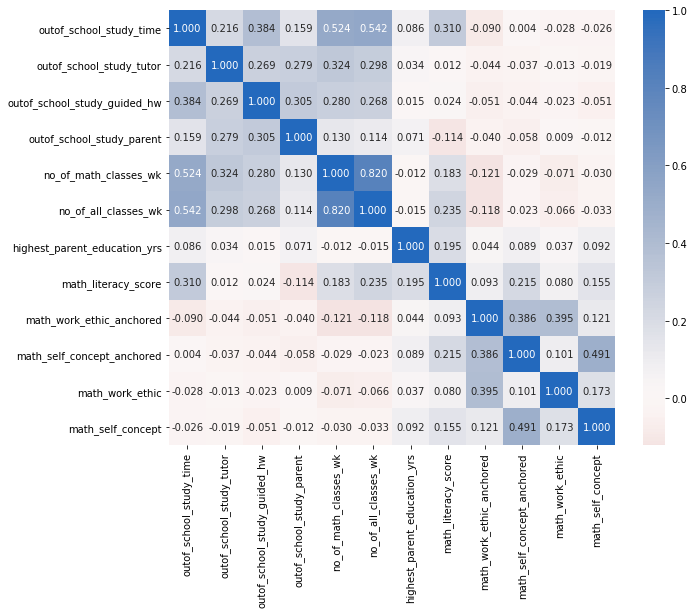

In [256]:
plt.figure(figsize=[10,8])
sb.heatmap(df_pisa_sample[numeric_vars].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0)
plt.show();

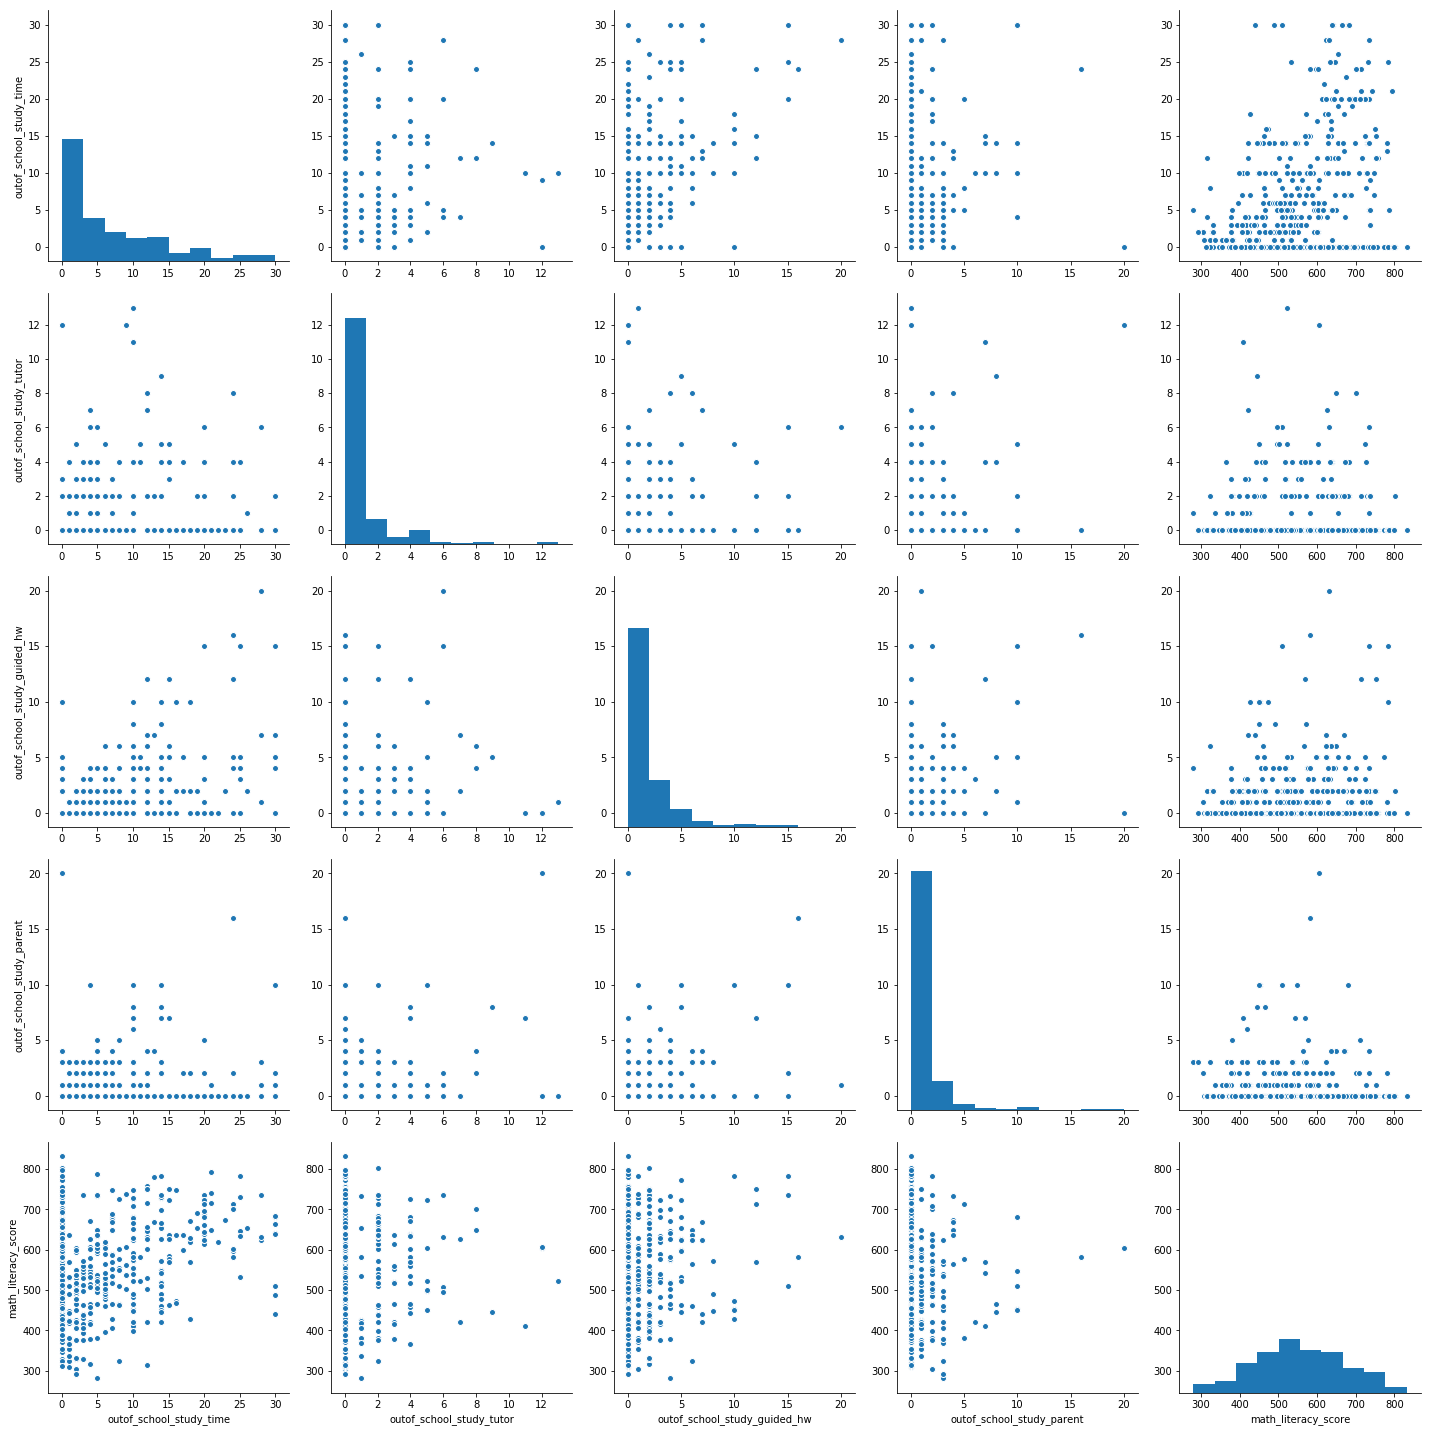

In [257]:
g = sb.pairplot(data=df_qv_sample, vars=['outof_school_study_time','outof_school_study_tutor', 
                                            'outof_school_study_guided_hw', 'outof_school_study_parent',
                                            'math_literacy_score'], size=4);

**Out of School study time**
<br/>
There appears to be a strong relationship with out of school study time and math literacy score

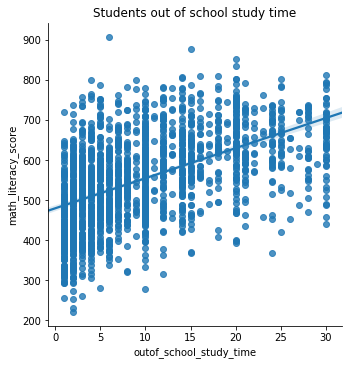

In [258]:
df_osch = df_pisa_sample[df_pisa_sample.outof_school_study_time != 0]
g = sb.lmplot(data=df_osch, x='outof_school_study_time', y='math_literacy_score')
plt.title('Students out of school study time');

Using a larger sample size, there is a gradual upward trend of math literacy scores with increase in time spent studying outside of school

**Out of School study with Tutor**
<br/>
There appears to be relationship between math literacy scores and time spent outside of school with tutors. This next plot will increase the sample size for this bivariate relationship.

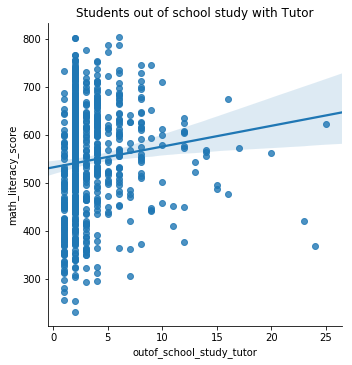

In [259]:
df_osch_t = df_pisa_sample[df_pisa_sample.outof_school_study_tutor != 0]
g = sb.lmplot(data=df_osch_t, x='outof_school_study_tutor', y='math_literacy_score', scatter=0.6,size=5)
plt.title('Students out of school study with Tutor');

A larger sample size shows a relationship between math literacy score and out of school hours spent with a tutor between one and ten hours.

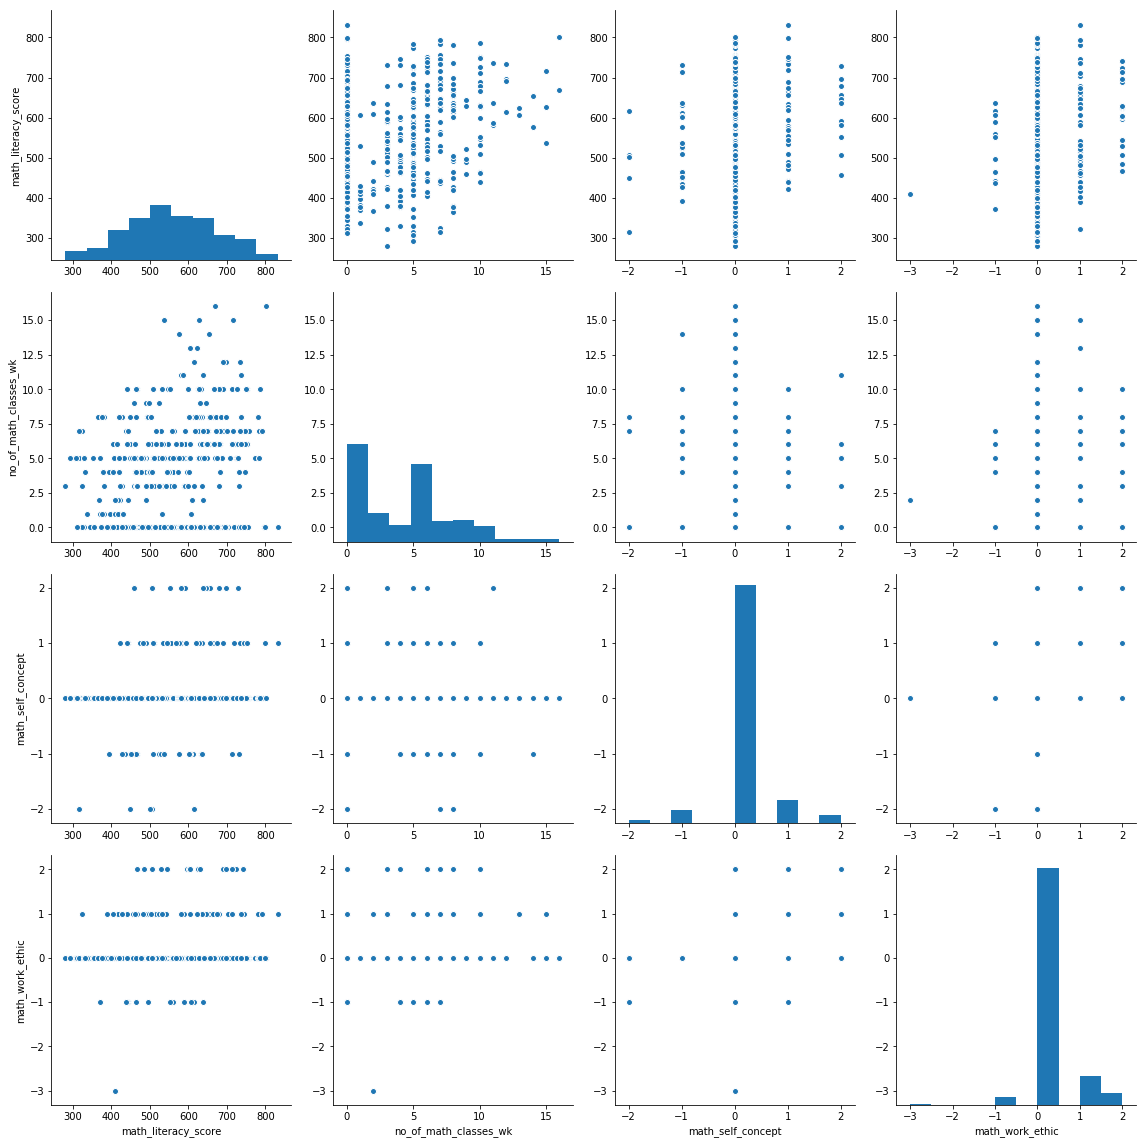

In [260]:
g = sb.pairplot(data=df_qv_sample, vars=['math_literacy_score','no_of_math_classes_wk','math_self_concept','math_work_ethic'], size=4);

**Number of math classes per week**<br/>
There appears to be a strong relationship between math literacy score and the number of math classes taken in a week by 15-year old students

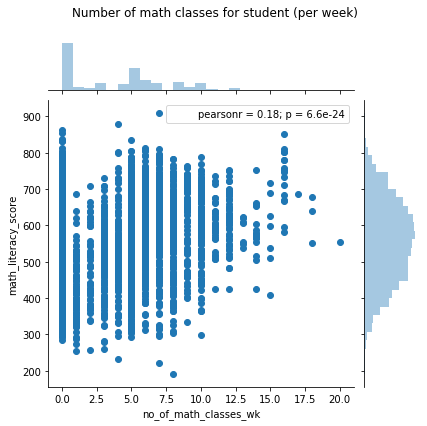

In [261]:
sb.jointplot(data=df_pisa_sample, x='no_of_math_classes_wk', y='math_literacy_score', size=6)
plt.suptitle('Number of math classes for student (per week)')
plt.subplots_adjust(top=0.9);

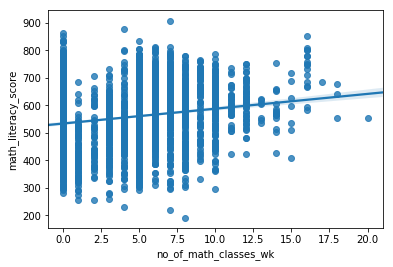

In [262]:
sb.regplot(data=df_pisa_sample, x='no_of_math_classes_wk', y='math_literacy_score');

The regplot shows a linear relationship between the number of math classes taken by 15-year old students and math literacy scores

**Proportion of Math classes taken to total number of classes (per week)**
<br/>
These charts below attempts to see if the increased proportion of math classes taken leads to higher math literacy scores

In [263]:
# proportion of no_of_math_classes_wk
df_new = df_pisa_sample[df_pisa_sample.no_of_all_classes_wk > 0]
df_prop_classes = df_new[['country','no_of_all_classes_wk', 'no_of_math_classes_wk', 'math_literacy_score']].copy()
df_prop_classes['prop_no_classes'] = df_prop_classes['no_of_math_classes_wk']/df_prop_classes['no_of_all_classes_wk']

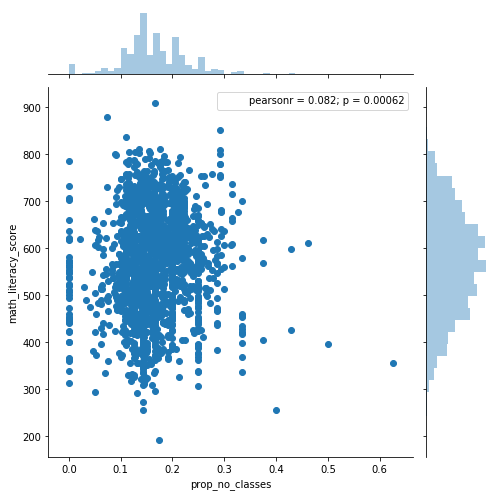

In [264]:
sb.jointplot(data=df_prop_classes, x='prop_no_classes', y='math_literacy_score', size=7);

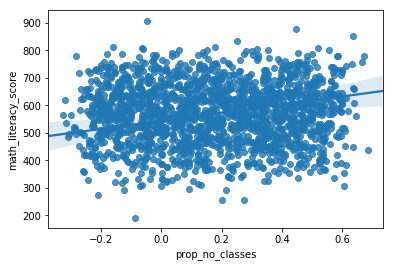

In [265]:
sb.regplot(data=df_prop_classes, x='prop_no_classes', y='math_literacy_score',x_jitter=0.4);

We do not see much of a linear relationship probably because there is a variability in the total number of classes taken per week by each student in China, Singapore, and United States

**Math Self concept**
<br>
Math Self concept has few data points in it's plot indicating that the sample size was not large enough.  A lot of values were missing and were filled with zero values.
<br/>
<br/>
Math Self concept is a derived score based on the following student responses (“Very likely”, “Likely”, “Slightly likely”, “Not at all likely”) to the questions below:
<ol>
    <li>I am just not good at mathematics</li>
    <li>I get good grades in mathematics</li>
    <li>I learn mathematics quickly</li>
    <li>I have always believed that mathematics is one of my best subjects</li>
    <li>In my mathematics class, I understand even the most difficult work</li>
</ol>

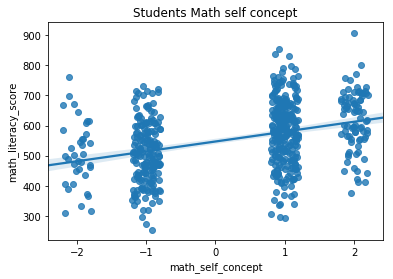

In [266]:
df_ms = df_pisa_sample[df_pisa_sample.math_self_concept != 0]
sb.regplot(data=df_ms, x='math_self_concept', y='math_literacy_score',x_jitter=0.2)
plt.title('Students Math self concept');

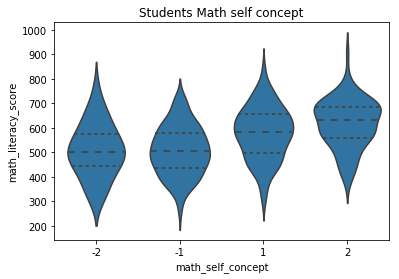

In [267]:
sb.violinplot(data=df_ms, x = 'math_self_concept', y = 'math_literacy_score', inner='quartile', color = base_color)
plt.title('Students Math self concept');

The two plots above were produced by first filtering out zero values for math self concept. There appears to be an increase in math literacy score for math self concept values above zero

**Math Work ethic**
<br/>
Math work ethic has few data points other than zero in this pair plot. A lot of missing values for math work ethic were replaced with zero values.
<br/>
Math work ethic is a derived score based on the following student responses (“Very likely”, “Likely”, “Slightly likely”, “Not at all likely”) to the questions below:
<ol>
    <li>I work hard on my mathematics homework</li>
    <li>I am prepared for my mathematics exams</li>
    <li>I study hard for mathematics quizzes</li>
    <li>I keep studying until I understand mathematics material</li>
    <li>I pay attention in mathematics class</li>
    <li>I listen in mathematics class</li>
    <li>I avoid distractions when I am studying mathematics</li>
    <li>I keep my mathematics work well organised</li>
</ol>

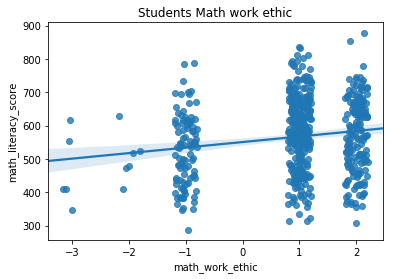

In [268]:
df_mwe = df_pisa_sample[df_pisa_sample.math_work_ethic != 0]
sb.regplot(data=df_mwe, x='math_work_ethic', y='math_literacy_score',x_jitter=0.2)
plt.title('Students Math work ethic');

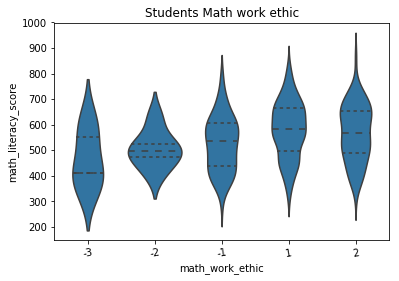

In [269]:
sb.violinplot(data=df_mwe, x='math_work_ethic', y='math_literacy_score', inner='quartile', color = base_color)
plt.xticks(rotation = 10)
plt.title('Students Math work ethic');

There appears to be relationship between math work ethic and math literacy.  The violin plot for math students math work ethic shows a higher math literacy score and greater density at the highest level of 2 on math work ethic axis.

### Bivariate Exploration Summary
The strongest biariate relationships appear to be with students out of school study time and the number of math classes taken. With larger sample sizes, we see stronger relationships between math literacy scores and math work ethic and math self concept derived scores.

## Multivariate Exploration <a name='multivariate'/>
<a href='#univariate' style='text-decoration:none;font-size:14px'>Go to Univariate Explore</a><br/>
<a href='#bivariate' style='text-decoration:none;font-size:14px'>Go to Bivariate Explore</a>

In [270]:
# create sample dataframe for Quantitative variables
numeric_cols=['country','outof_school_study_time','outof_school_study_tutor', 'outof_school_study_guided_hw', 'outof_school_study_parent',
      'no_of_math_classes_wk', 'no_of_all_classes_wk', 'highest_parent_education_yrs','math_literacy_score',
      'math_work_ethic_anchored','math_self_concept_anchored', 'math_work_ethic', 'math_self_concept']
df_multiv_sample = create_dataframe_sample(numeric_cols, False, 400)

### Out Of School Study Time And Math Literacy Score

We try to answer the question of whether increased time studying outside of school correlates to higher math literacy scores for 15-year old students. For 15-year old students who spend time outside school studying, between 1 to 30 hours, China and Singapore achieve considerably higher math literacy scores than the United States of America. For out of school time spent with tutors between 2 to 5 hours, students from China and Singapore have the highest math literacy scores.

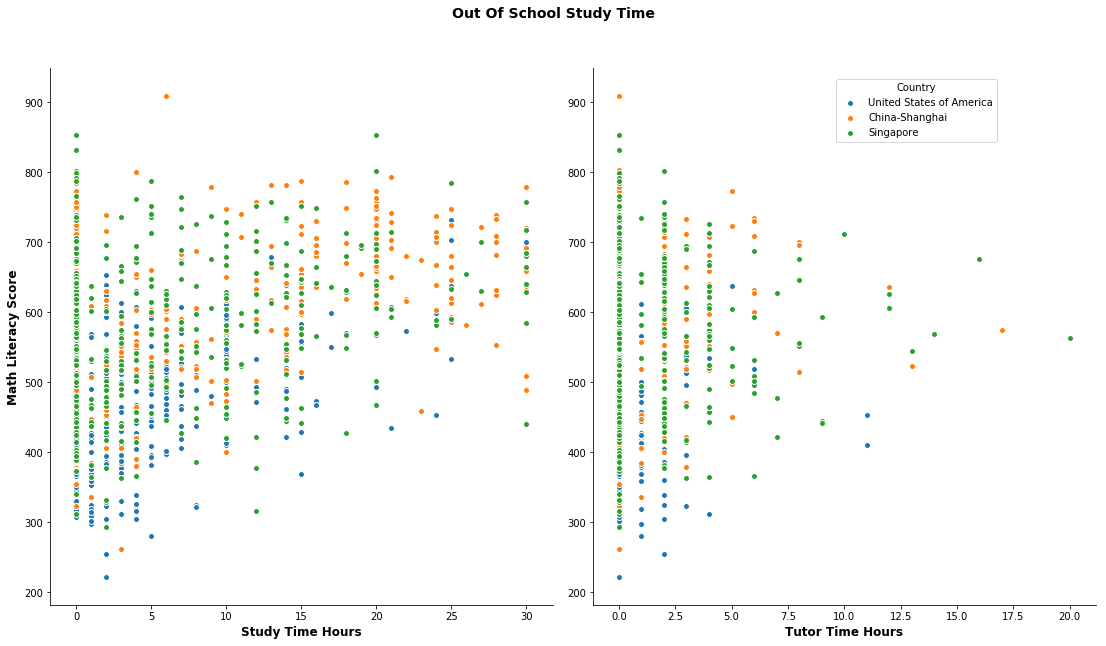

In [271]:
g = sb.pairplot(data=df_multiv_sample, size=8.27, aspect=0.8,  x_vars=['outof_school_study_time','outof_school_study_tutor'],
                                            y_vars=['math_literacy_score'], hue='country')
g.axes[0,0].xaxis.set_label_text('Study time hours'.title(), fontsize=12, weight="bold")
g.axes[0,1].xaxis.set_label_text('Tutor time hours'.title(), fontsize=12, weight="bold")
g.axes[0,0].yaxis.set_label_text('Math literacy score'.title(), fontsize=12, weight="bold")
g._legend.set_title("Country")
g._legend.set_bbox_to_anchor((0.9, 0.9))
plt.tight_layout()
plt.suptitle('Out Of School Study Time'.title(), fontsize=14, weight="bold", y=1.08);

### Students Taking Math Classes And Math Literacy Score

Starting at five math classes taken per week, students from China and Singapore have the highest math literacy scores, between 700 and 800. We do not see students from the United States of America taking more than 5 math classes per week. We do not see 15-year old students from the United States reaching math literacy scores at any number of math classes taken per week.

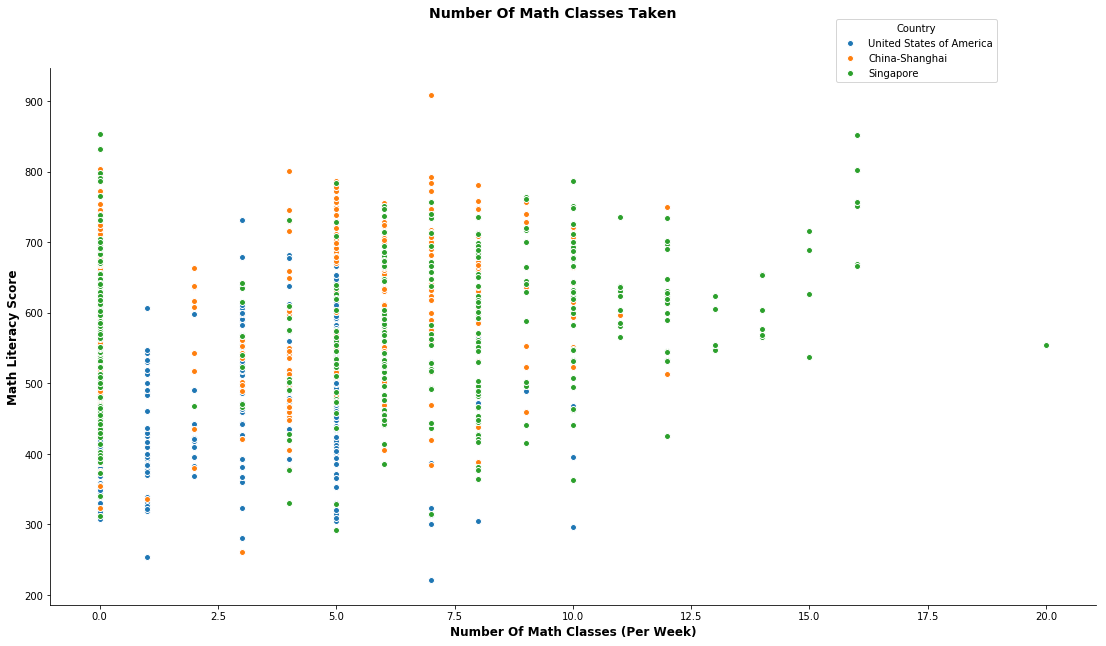

In [276]:
g = sb.pairplot(data=df_multiv_sample, size=8.27, aspect=1.6, x_vars=['no_of_math_classes_wk'], y_vars=['math_literacy_score'],
                                            hue='country')
g.axes[0,0].xaxis.set_label_text('Number Of Math Classes (per week)'.title(), fontsize=12, weight="bold")

g.axes[0,0].yaxis.set_label_text('Math literacy score'.title(), fontsize=12, weight="bold")
g._legend.set_title("Country")
g._legend.set_bbox_to_anchor((0.9, 1.0))
plt.tight_layout()
plt.suptitle('Number Of Math Classes Taken'.title(), fontsize=14, weight="bold", y=1.08);


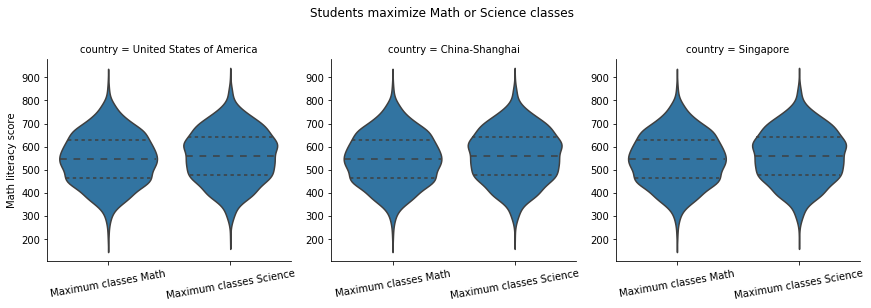

In [273]:
g = sb.FacetGrid(df_b, col='country', size=4)
g.map(sb.violinplot, x=df_b['Maximize Math or Science classes'], y=df_b['math_literacy_score'], inner='quartile', color = base_color )
plt.suptitle('Students maximize Math or Science classes')
plt.subplots_adjust(top=0.8)
g.set_xticklabels(rotation=10)
g.set_ylabels('Math literacy score');

15-year old students from China, Singapore, and United States seem to have identical median math literacy scores whether they choose to maximize math or science classes

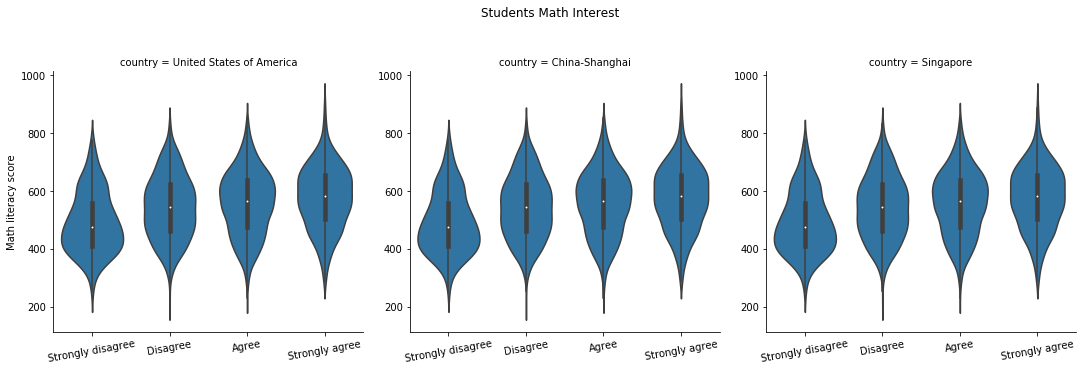

In [274]:
#sb.boxplot(data=df_st, x='Math Interest', y='math_literacy_score', color=base_color)
g = sb.FacetGrid(df_st, col='country', size=5)
g.map(sb.violinplot, x=df_st['Math Interest'], y=df_st['math_literacy_score'], color = base_color )
plt.suptitle('Students Math Interest')
plt.subplots_adjust(top=0.8)
g.set_xticklabels(rotation=10)
g.set_ylabels('Math literacy score');

Based on this sample data, students interested in math in all three countries have math literacy scores between 500 and 600.

### Final outcomes

The features that stand out are:
- Number of hours spent studying outside of school
- Number of hours spent with tutor outside of school
- Number math classes taken per week

In all three of these features, 15-year old students from China and Singapore outperform 15-year old students from the United States in math literacy scores.

In the univariate exploration, it is revealed that the United States 15-year old students spend a lot more time outside of school studying between 1 and 5 hours per week than students from China and Singapore.  But what's surprising is that in the multivariate exploration, 15-year old students from China and Singapore score higher on math literacy at all hours spent studying outside of school.

While there are differences in 15-year old students from the United States versus China and Singapore, the data file was comprised of mostly student responses to questionnaires.  What is missing in the data file are the parent and school questionnaire responses. Separate questionairres were give to teachers, parents and school employees but these responses were not in the PISA 2012 source data file.  This study was therefore skewed on student responses and math scores.  Although there are differences drawn out between 15-year old students of the United States versus China and Singapore, it was not convincing enough to explain why a large and wealthy country like the United States ranked 36 out of 65 countries on the math literacy PISA scores.